# Tutorial using Scikit-learn

Scikit-learn contains simple and efficient tools for data mining and data analysis.  It implements a wide variety of machine learning algorithms and processes to conduct advanced analytics.

Library documentation: <a>http://scikit-learn.org/stable/</a>

### General

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
# import a sample dataset and view the data
digits = datasets.load_digits()
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [3]:
# view the target variable
digits.target

array([0, 1, 2, ..., 8, 9, 8])

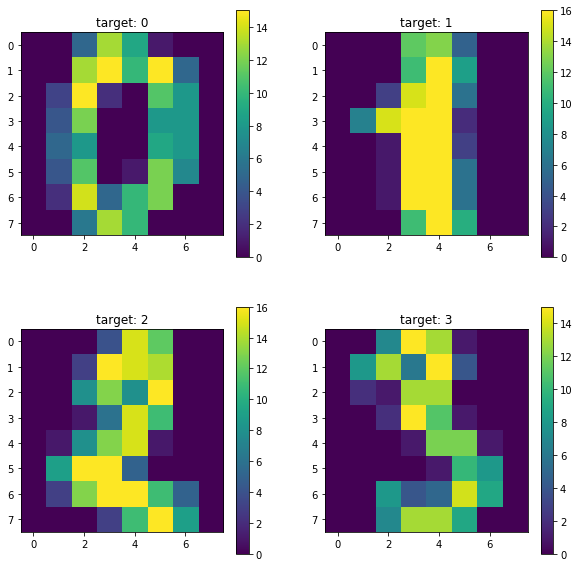

In [4]:
# Show the images
plt.figure(figsize=(10,10))
for i in range(4):    
    plt.subplot(2, 2, i+1)
    plt.imshow(digits.images[i])
    plt.colorbar()
    plt.title('target: {0}'.format(digits.target[i]))
plt.show()

### Support Vector Machine (SVM)

In [5]:
# train a support vector machine using everything but the last example, kernel rbf
classifier = svm.SVC(gamma=0.001, C=100.)
classifier.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# predict the target of the last example
classifier.predict(np.reshape(digits.data[-1], (1,-1)))

array([8])

In [7]:
# persist the model and reload
import pickle
from sklearn.externals import joblib

joblib.dump(classifier, 'data/model.pkl')
classifier2 = joblib.load('data/model.pkl')
classifier2.predict(np.reshape(digits.data[-1], (1,-1)))

array([8])

In [8]:
import os

os.remove('data/model.pkl')

In [46]:
# another example with the digits data set, kernel linear
svc = svm.SVC(C=1, kernel='linear')
svc.fit(digits.data[:-100], digits.target[:-100]).score(digits.data[-100:], digits.target[-100:])
print(svc)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [10]:
# perform cross-validation on the estimator's predictions
from sklearn import cross_validation as cv

k_fold = cv.KFold(n=6, n_folds=3)
for train_indices, test_indices in k_fold:
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


/usr/lib64/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# apply to the model
kfold = cv.KFold(len(digits.data), n_folds=3)
cv.cross_val_score(svc, digits.data, digits.target, cv=kfold, n_jobs=-1)

array([ 0.93489149,  0.95659432,  0.93989983])

In [43]:
# use the grid search module to optimize model parameters
from sklearn import grid_search as gs

gammas = np.logspace(-6, -1, 10)
classifier = gs.GridSearchCV(estimator=svc, param_grid=dict(gamma=gammas), n_jobs=-1)
classifier_pred = classifier.fit(digits.data[:1000], digits.target[:1000])
print(classifier)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gamma': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [13]:
classifier.best_score_

0.924

In [14]:
classifier.best_estimator_.gamma

9.9999999999999995e-07

In [15]:
# run against the test set
classifier.score(digits.data[1000:], digits.target[1000:])

0.94228356336260977

In [ ]:
print("Number of mislabeled points : %d" % (iris.target != sgd_pred).sum())

In [17]:
# nested cross-validation example
cv.cross_val_score(classifier, digits.data, digits.target)

array([ 0.93521595,  0.95826377,  0.93791946])

### Other Classifiers

In [18]:
# import the iris dataset
iris = datasets.load_iris()

### K-nearest neighbors (KNN)

In [44]:
# k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_pred = knn.fit(iris.data, iris.target)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [39]:
print(knn.score(iris.data, iris.target))
print(knn.n_neighbors)
print("Number of mislabeled points : %d" % (iris.target != knn_pred).sum())

0.966666666667
5
Number of mislabeled points : 150


### Decision Tree

In [45]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree_pred = dtree.fit(iris.data, iris.target)
print(dtree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [37]:
print(dtree.score(iris.data, iris.target))
print(dtree.n_classes_)
print("Number of mislabeled points : %d" % (iris.target != dtree_pred).sum())

1.0
3
Number of mislabeled points : 150


### Stchastic Gradient Descent (SGD)

In [47]:
# stochastic gradient descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2")
sgd_pred = sgd.fit(iris.data, iris.target)
print(sgd)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)


In [34]:
print(sgd.score(iris.data, iris.target))
print(sgd.classes_)
print("Number of mislabeled points : %d" % (iris.target != sgd_pred).sum())

0.753333333333
[0 1 2]
Number of mislabeled points : 150


In [31]:
### Naive Bayer (NB)

In [60]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print(gnb)

GaussianNB(priors=None)


In [62]:
print("Number of mislabeled points : %d" % (iris.target != gnb_pred).sum())

Number of mislabeled points : 6


### Regression

In [50]:
# load another sample dataset
diabetes = datasets.load_diabetes()

In [51]:
# linear regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes.data, diabetes.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# regression coefficients
print(regr.coef_)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


In [53]:
# mean squared error
np.mean((regr.predict(diabetes.data)-diabetes.target)**2)

2859.6903987680657

In [54]:
# explained variance
regr.score(diabetes.data, diabetes.target)

0.51774942541329338

In [55]:
# ridge regression
regr = linear_model.Ridge(alpha=.1)
regr.fit(diabetes.data, diabetes.target)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
# lasso regression
regr = linear_model.Lasso()
regr.fit(diabetes.data, diabetes.target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
# logistic regression (this is actually a classifier)
iris = datasets.load_iris()
logistic = linear_model.LogisticRegression(C=1e5)
logistic_pred = logistic.fit(iris.data, iris.target)

In [59]:
print("Number of mislabeled points : %d" % (iris.target != logistic_pred).sum())

Number of mislabeled points : 150


### Preprocessing

In [65]:
# feature scaling
from sklearn import preprocessing

X = np.array([[ 1., -1.,  2.],
               [ 2.,  0.,  0.],
               [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X)
print(X_scaled)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [66]:
# save the scaling transform to apply to new data later
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
scaler.transform(X)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [68]:
# range scaling
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax

array([[ 0.5       ,  0.        ,  1.        ],
       [ 1.        ,  0.5       ,  0.33333333],
       [ 0.        ,  1.        ,  0.        ]])

In [69]:
# instance normalization using L2 norm
X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [70]:
# category encoding
enc = preprocessing.OneHotEncoder()
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
enc.transform([[0, 1, 3]]).toarray()

array([[ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]])

In [71]:
# binning
binarizer = preprocessing.Binarizer().fit(X)
binarizer.transform(X)

array([[ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

### Clustering

In [72]:
# k means clustering
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=3)
k_k_means.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
k_means.n_clusters

3

### Decomposition

In [80]:
# create a signal with 2 useful dimensions
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2
X = np.c_[x1, x2, x3]
print(np.shape(X))
print(X[:5,:])

(100, 3)
[[ 0.18090096 -1.36438493 -1.18348396]
 [ 0.9497351   0.09394428  1.04367938]
 [-0.43922763  0.93197303  0.4927454 ]
 [ 1.49957646  0.12009562  1.61967208]
 [-0.84499973 -1.03727539 -1.88227512]]


In [81]:
# principal component analysis
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [82]:
pca.explained_variance_

array([  2.52563680e+00,   9.88014454e-01,   9.97679057e-32])

In [83]:
# only the 2 first components are useful
pca.n_components = 2
X_reduced = pca.fit_transform(X)
X_reduced.shape

(100, 2)

In [84]:
# generate more sample data
time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time)  # signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # signal 2 : square signal
S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis=0)  # standardize data

In [85]:
# mix data
A = np.array([[1, 1], [0.5, 2]])  # mixing matrix
X = np.dot(S, A.T)  # generate observations

In [86]:
# compute independent component analysis
ica = decomposition.FastICA()
S_ = ica.fit_transform(X)  # get the estimated sources
A_ = ica.mixing_.T
np.allclose(X,  np.dot(S_, A_) + ica.mean_)

True